# Applied Data Analysis Project
**Team**: ToeStewBrr - Alexander Sternfeld, Marguerite Thery, Antoine Bonnet, Hugo Bordereaux

**Dataset**: CMU Movie Summary Corpus

## Textual Analysis

**Overview**:
* 1. [Removing stopwords](#Section_1)
* 2. [Semantic scoring](#Section_2)
* 3. [Love words extraction](#Section_3)
* 4. [Representing the data](#Section_4)
* 5. [Next steps](#Section_5)
    - 5.1 [Reference vector](#Section_5.1)
    - 5.2 [Threshold](#Section_5.2)

In [1]:
from load_data import *
from textual_analysis import *
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Load Natural Language Tool Kit (NLTK) word banks
nltk.download('stopwords')
nltk.download('punkt')

#Load the spacy model for the semantic analysis
nlp_spacy = spacy.load("en_core_web_lg")

download_data()
plot_df = load_plot_df()
movie_df = load_movie_df()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\borde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\borde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\borde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\borde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 1. Removing stopwords

A stop word is a frequently used term that a search engine has been configured to ignore, both while indexing entries for searching and when retrieving them as the result of a search query. Examples of stop words include "the," "a," "an," and "in."
We don't want these terms to take up any unnecessary storage space or processing time in our database. By keeping a record of the terms you believe to be stop words, we may easily eliminate them for this reason.

In [2]:
#copy the plot_df to a new dataframe
plot_df_removed = plot_df.copy()
#Remove stopwords from the summaries
plot_df_removed['Summary'] = plot_df['Summary'].apply(remove_stopwords)

### 2. Semantic scoring

The semantic scoring is done thanks to the [SpaCy](https://spacy.io/) library that has pretrained word vectors for our semantic scoring. Similarity is determined based on word vectors that are generated thanks to the Word2vec technique. The idea is that a word can be described as several weights in a vector with high dimensionality. We then look at the distance between the vectors to assess on the similarity between words. Vectors can represent a word only but also a text in general.

In [3]:
#The reference word is the word that we want to find the similarity with
words = nlp_spacy("love")

#Create a column with the similarity score of the summaries to each word in words
for word in words:
        plot_df_removed[word.text] = np.nan
        plot_df_removed[word.text] = plot_df_removed['Summary'].apply(lambda x: nlp_spacy(' '.join(x)).similarity(words))

#sort the dataframe by the similarity score
plot_df_removed.sort_values(by='love', ascending=False, inplace=True)
plot_df_removed.head()


,Wikipedia ID,Summary,love
20385,29472242,"[naaraaz, stori, wealthi, ajay, pandit, poor, ...",0.724953
1891,22868781,"[panneer, pushpang, love, stori, suresh, shant...",0.714422
4041,5315533,"[magali, winemak, widow, love, work, feel, lon...",0.713660
23142,34992086,"[az, smart, cheer, talent, boy, love, life, fr...",0.711653
26039,24087983,"[young, pakistani, woman, forc, choos, arrang,...",0.705870


Text(0.5, 0, 'Similarity score to the word "love"')

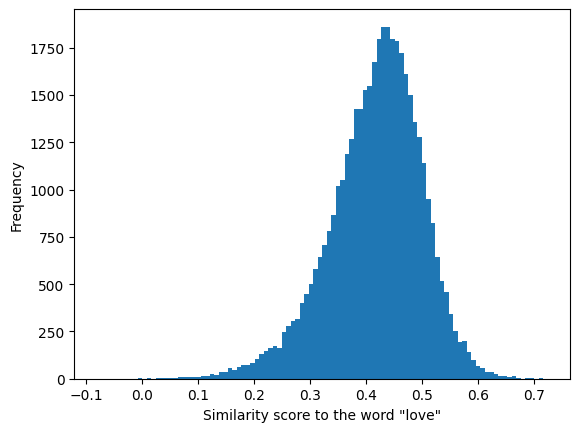

In [4]:
#plot the similarity score of the summaries to the reference word
plot_df_removed['love'].plot(kind='hist', bins=100)
plt.ylabel('Frequency')
plt.xlabel('Similarity score to the word "love"')


### 3. Love words extraction

This part's aim is to find the words in the summary that are love-related in case we need them later. They are extracted based on the same word2vec method by setting a threshold on the similarity they have with the word "love".

In [5]:
#The threshold is the minimum similarity score to be considered a love-related word
love_threshold = 0.35

#Create a column with the love-related words in the summaries
plot_df_removed['love_words'] = np.nan
plot_df_removed['love_words'] = plot_df_removed['Summary'].apply(lambda x :extract_love_words(x, words=words, threshold=love_threshold))

#sort love-related words by similarity to love
for word in words:
    plot_df_removed['love_words'] = plot_df_removed['love_words'].apply(lambda x: sorted(x, key=lambda y: nlp_spacy(y).similarity(words)))


c:\Users\borde\Documents\EPFL\MA3\ADA\Project\ada-2022-project-toestewbrr\textual_analysis.py:43: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  love_words += [token.text for token in nlp_spacy(' '.join(text)) if token.similarity(word) > threshold]


In [6]:
plot_df_removed.head()

,Wikipedia ID,Summary,love,love_words
20385,29472242,"[naaraaz, stori, wealthi, ajay, pandit, poor, ...",0.724953,"[respect, friendship, love]"
1891,22868781,"[panneer, pushpang, love, stori, suresh, shant...",0.714422,[love]
4041,5315533,"[magali, winemak, widow, love, work, feel, lon...",0.713660,"[find, husband, feel, want, friend, love]"
23142,34992086,"[az, smart, cheer, talent, boy, love, life, fr...",0.711653,"[talent, find, cheer, life, dream, love]"
26039,24087983,"[young, pakistani, woman, forc, choos, arrang,...",0.705870,"[young, true, love]"


In [7]:
#concatenate all the love-related words in a list
love_words = []
love_words = [love_words + word for word in plot_df_removed["love_words"]]
love_words = np.unique(list(np.concatenate(love_words).flat))
print(love_words)

['abou' 'about' 'absolut' 'adulteress' 'advent' 'adventuress' 'afraid'
 'ageless' 'alwa' 'amaz' 'ambi' 'angel' 'angela' 'angelfish' 'angeli'
 'angelica' 'anger' 'artless' 'assort' 'babyhood' 'bather' 'beardless'
 'beau' 'beauti' 'beautif' 'befriend' 'beli' 'belief' 'believ'
 'bestfriend' 'better' 'birthright' 'bitter' 'bitterest' 'bittersweet'
 'blameless' 'bless' 'bling' 'bliss' 'bloodless' 'bloom' 'blossom'
 'bother' 'boundless' 'boyfriend' 'brave' 'braveheart' 'breadth'
 'breather' 'breathless' 'bright' 'brill' 'brilliant' 'brotherhood'
 'candlelight' 'candor' 'candour' 'careless' 'caress' 'careworn' 'cassio'
 'characterless' 'charisma' 'charm' 'charmer' 'charmless' 'chee' 'cheela'
 'cheer' 'cheerless' 'cheez' 'cheri' 'cherish' 'chil' 'childhood'
 'childish' 'childless' 'chilla' 'chillum' 'chillun' 'choicest' 'christen'
 'christendom' 'clever' 'cleverest' 'clive' 'cloudless' 'clove'
 'colorblind' 'come' 'comfort' 'companionship' 'compassion' 'conceit'
 'confess' 'confetti' 'cool' 'c

### 4. Representing the semantic proximity

Here we will present the pipeline to plot our word vectors and the semantic proximity between them. We can also perform clustering on the vectors to see if we can find some interesting patterns.

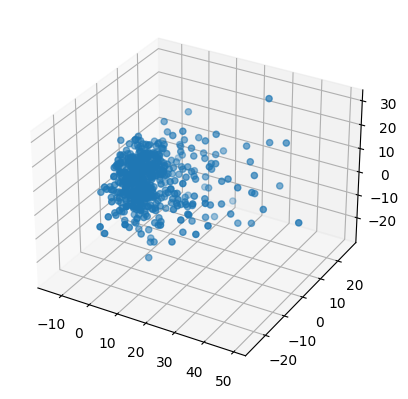

In [8]:
#Create a list of semantic vectors for each love-related word
love_words_vectors = [nlp_spacy(str(word)).vector for word in love_words]

#reduce the dimensionality of the word vectors to 3D
pca = PCA(n_components=3)
love_words_vectors_3D = pca.fit_transform(love_words_vectors)

#plot the 3D word vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(love_words_vectors_3D[:,0], love_words_vectors_3D[:,1], love_words_vectors_3D[:,2])


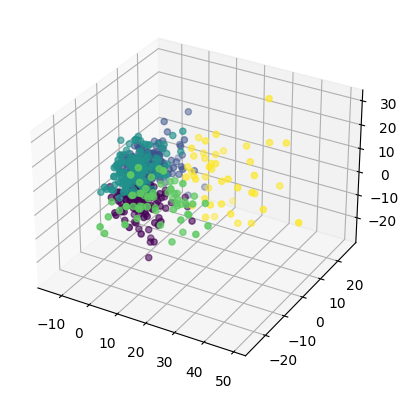

In [9]:
#cluster the word vectors with kmeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(love_words_vectors_3D)

#plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(love_words_vectors_3D[:,0], love_words_vectors_3D[:,1], love_words_vectors_3D[:,2], c=kmeans.labels_)
plt.show()

### 5. Next Steps

We have 2 main problems with this approach:
- How shall we define the reference vector ?
- How is the threshold set ?

#### 5.1. Reference vector

The reference vector for now is just the semantic vector of the word "love". We have to implement a methodology that allows us to find the best reference vector. We have to find a way to define the reference vector in a way that it scores high all the summaries that depicts a relationship. To do this we are thinking of a cross-validation approach and use the movies labeled as romantic by their genres as the target true positives.

#### 5.2. Threshold

Once we have a correct reference vector that scores the summaries as wanted, we need to find the best way to set the threshold splitting the movies that depicts a relation from the ones that don't. We are thinking of using an F1-scoring method to find it.